In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/properati_br_2016_11_01_properties_rent-Copy1.csv')

In [3]:
data.head(1)

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat_lon,lat,lon,price,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,location
0,2013-04-25,rent,apartment,Praia Grande,|Brasil|São Paulo|Praia Grande|,NaN,NaN,NaN,NaN,900.0,...,NaN,NaN,NaN,1.0,NaN,http://praia-grande-sao-paulo.properati.com.br...,"Otimo Imovel com o melhor valor da regiao, con...",Apartamento Em Praia Grande,NaN,NaN


In [4]:
data_sp = pd.read_csv('../datasets/sao-paulo-properties-april-2019-Copy1.csv')

In [5]:
data_sp.head(1)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486


In [6]:
data.columns

Index(['created_on', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'geonames_id', 'lat_lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'location'],
      dtype='object')

In [7]:
data_sp.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'],
      dtype='object')

In [8]:
data_sp['Negotiation Type'].value_counts()#normalize = True#

rent    7228
sale    6412
Name: Negotiation Type, dtype: int64

In [9]:
data_sp.rename(inplace = True, columns= {
                                    'Negotiation Type' : 'operation',
                                    'Property Type' : 'property_type',
                                    'Latitude' : 'lat',
                                    'Longitude' : 'lon',
                                    'Price' : 'price'
});

In [10]:
data_sp_concat = data_sp[['operation', 'property_type', 'lat', 'lon', 'price']]

In [11]:
columns_to_add = [
    'place_with_parent_names'
]



for i in columns_to_add:
    data_sp_concat[i] = 'Sao Paulo|Sao Paulo'

/Users/matteocangiano/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
data_sp_concat['lat_lon'] = 0

/Users/matteocangiano/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
for i in range(len(data_sp_concat['lat'])):

        data_sp_concat['lat_lon'][i] = f'POINT({round(data_sp_concat["lon"][i], 6)} {round(data_sp_concat["lat"][i], 6)})'
  

/Users/matteocangiano/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/matteocangiano/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/matteocangiano/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1024: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [14]:
data_brazil_concat = data[['operation', 'property_type', 'lat', 'lon', 'price', 'place_with_parent_names', 'lat_lon' ]]

### Concat Ready DataFrames:

In [15]:
data_sp_concat = data_sp_concat.drop(columns = ['place_with_parent_names', 'lat_lon'])

In [16]:
data_brazil_concat = data_brazil_concat.drop(columns = ['place_with_parent_names', 'lat_lon'])

In [17]:
data_test = data_brazil_concat[data_brazil_concat['lat'].isnull() == 0]

In [18]:
data_brazil_concat= data_test[data_test['price'].isnull() == 0]

In [19]:
data_brazil_concat.to_csv('data_brazil_concat.csv', index = False)

In [20]:
data_test.shape

(46030, 5)

In [21]:
data_sp_concat.to_csv('data_sp_concat.csv', index = False)

In [22]:
data_sp_concat

,operation,property_type,lat,lon,price
0,rent,apartment,-23.543138,-46.479486,930
1,rent,apartment,-23.550239,-46.480718,1000
2,rent,apartment,-23.542818,-46.485665,1000
3,rent,apartment,-23.547171,-46.483014,1000
4,rent,apartment,-23.525025,-46.482436,1300
...,...,...,...,...,...
13635,sale,apartment,-23.653004,-46.635463,265000
13636,sale,apartment,-23.648930,-46.641982,545000
13637,sale,apartment,-23.649693,-46.649783,515000
13638,sale,apartment,-23.652060,-46.637046,345000


In [23]:
print(f'Max Price (sale): {max(data[(data["price"].isnull() == 0) & (data["price"] != 0)]["price"])}')
print(f'Min Price (rent): {min(data[(data["price"].isnull() == 0) & (data["price"] != 0)]["price"])}')

Max Price (sale): 470000.0
Min Price (rent): 170.0


(array([4.266e+04, 2.760e+02, 4.300e+01, 1.800e+01, 1.400e+01, 1.100e+01,
        3.000e+00, 7.000e+00, 7.000e+00, 2.000e+00]),
 array([1.80000e+02, 3.51620e+04, 7.01440e+04, 1.05126e+05, 1.40108e+05,
        1.75090e+05, 2.10072e+05, 2.45054e+05, 2.80036e+05, 3.15018e+05,
        3.50000e+05]),
 <a list of 10 Patch objects>)

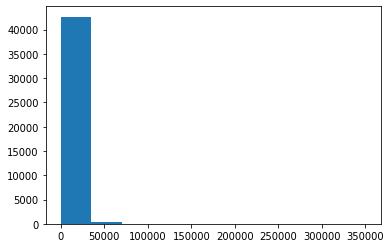

In [24]:
plt.hist(data_brazil_concat[(data_brazil_concat['price'].isnull()) == 0 & (data_brazil_concat["price"] != 0)]["price"])

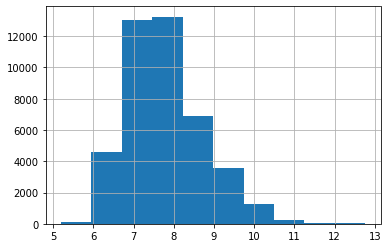

In [25]:

np.log(data_brazil_concat[(data_brazil_concat['price'].isnull() == 0) & (data_brazil_concat["price"] != 0.0)]["price"]).hist()

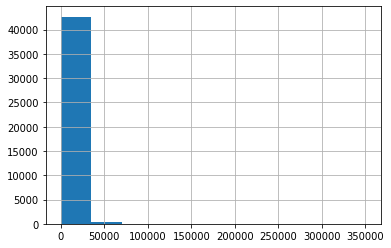

In [26]:
data_brazil_concat[(data_brazil_concat['price'].isnull() == 0) & (data_brazil_concat["price"] != 0.0)]["price"].hist()

(array([1.282e+04, 5.960e+02, 1.160e+02, 5.200e+01, 1.900e+01, 1.600e+01,
        7.000e+00, 1.000e+01, 2.000e+00, 2.000e+00]),
 array([4.800000e+02, 1.000432e+06, 2.000384e+06, 3.000336e+06,
        4.000288e+06, 5.000240e+06, 6.000192e+06, 7.000144e+06,
        8.000096e+06, 9.000048e+06, 1.000000e+07]),
 <a list of 10 Patch objects>)

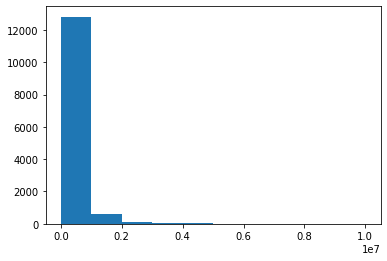

In [27]:
plt.hist(data_sp['price'])

In [28]:
data['price'].value_counts()

1500.0     3885
1200.0     3678
1000.0     3499
2000.0     3416
2500.0     3300
           ... 
8950.0        1
7392.0        1
60387.0       1
5501.0        1
20475.0       1
Name: price, Length: 2051, dtype: int64

In [30]:
data_sp[data_sp['price'] == 8_000_000]

,price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,operation,property_type,lat,lon
5006,8000000,0,278,4,5,3,5,1,0,1,0,Vila Olimpia/São Paulo,sale,apartment,-23.596469,-46.680587
7152,8000000,0,269,4,5,4,4,1,0,1,0,Itaim Bibi/São Paulo,sale,apartment,-23.588294,-46.680764


In [ ]:
data.head()

## Investigating Price Column

In [39]:
data_brazil_concat[data_brazil_concat['price'] > 100_000].sort_values(by= 'price', ascending=False)

,operation,property_type,lat,lon,price
28778,rent,house,-23.310879,-51.118008,350000.0
92508,rent,apartment,-23.965578,-46.336824,320000.0
11883,rent,house,-24.022867,-46.471424,315000.0
92609,rent,apartment,-22.985530,-43.199976,312500.0
26146,rent,apartment,-22.985530,-43.199976,312500.0
...,...,...,...,...,...
90921,rent,store,-23.552631,-46.676865,107015.0
16293,rent,store,-22.849484,-47.154616,106489.0
16248,rent,store,-22.848942,-47.153857,106489.0
16244,rent,store,-22.850905,-47.154695,104586.0
